# modDR-Framework-example: UCI-ID 186, Wine Quality

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

In [3]:
import sys

sys.path.append("../")
import evaluation
import processing
import utils
import visualization

In [4]:
# fetch dataset (available at https://archive.ics.uci.edu/dataset/186/wine+quality)
dataset = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_uci186 = pd.DataFrame(dataset.data.features)
y_uci186 = pd.DataFrame(dataset.data.target)

X_uci186.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [5]:
sim_features_uci186 = ["fixed_acidity", "volatile_acidity", "residual_sugar", "alcohol"]

# MDS

## UMAP (10), DR, MDS, Leiden ([1.0, 0.1, 0.05, 0.01, 0.005]), no boundary

In [183]:
mod_embeddings = processing.run_pipeline(
    data=X_uci186,
    sim_features=sim_features_uci186,
    dr_method="UMAP",
    dr_param_n_neigbors=10,
    graph_method="DR",
    # community_resolutions=[0.1, 0.05, 0.01, 0.005],
    community_resolutions=[0.1],
    layout_method="MDS",
    boundary_neigbors=False,
    iterations=None,
    compute_metrics=False,
    verbose=True,
)

------------------------------------------------------------
Start modDR pipeline with the following parameters:
Dimensionality Reduction Method: UMAP
Graph Construction Method: DR
Community Detection Resolutions: [0.1]
Layout Method: MDS


d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



------------------------------------------------------------
Set edge-weights as feature-similarities for embedding: `UMAP (n_neigbors: 10, min_dist: 1.0)'.
Edge-weights set for 36709 edges in the graph.
------------------------------------------------------------
------------------------------------------------------------
Computing communities via Leiden detection for embedding: `UMAP (n_neigbors: 10, min_dist: 1.0)' with resolution '0.1'.
Computation finished after 1.28 seconds.
Found 274 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 10, min_dist: 1.0), Leiden (resolution: 0.1)'.
Start computation with MDS-algorithm.
INFO: Skipping partition 272 with only 1 node(s) for MDS layouting.
INFO: Skipping partition 273 with only 1 node(s) for MDS layouting.
Computation of new positions finished after 99.88 seconds.
--------------------------------

In [181]:
sim_features_reduced = PCA(n_components=1).fit_transform(X_uci186[sim_features_uci186])
feat_labels = {i: sim_features_reduced[i] for i in range(len(sim_features_reduced))}

for mod_embedding in mod_embeddings:
    mod_embedding.labels = feat_labels

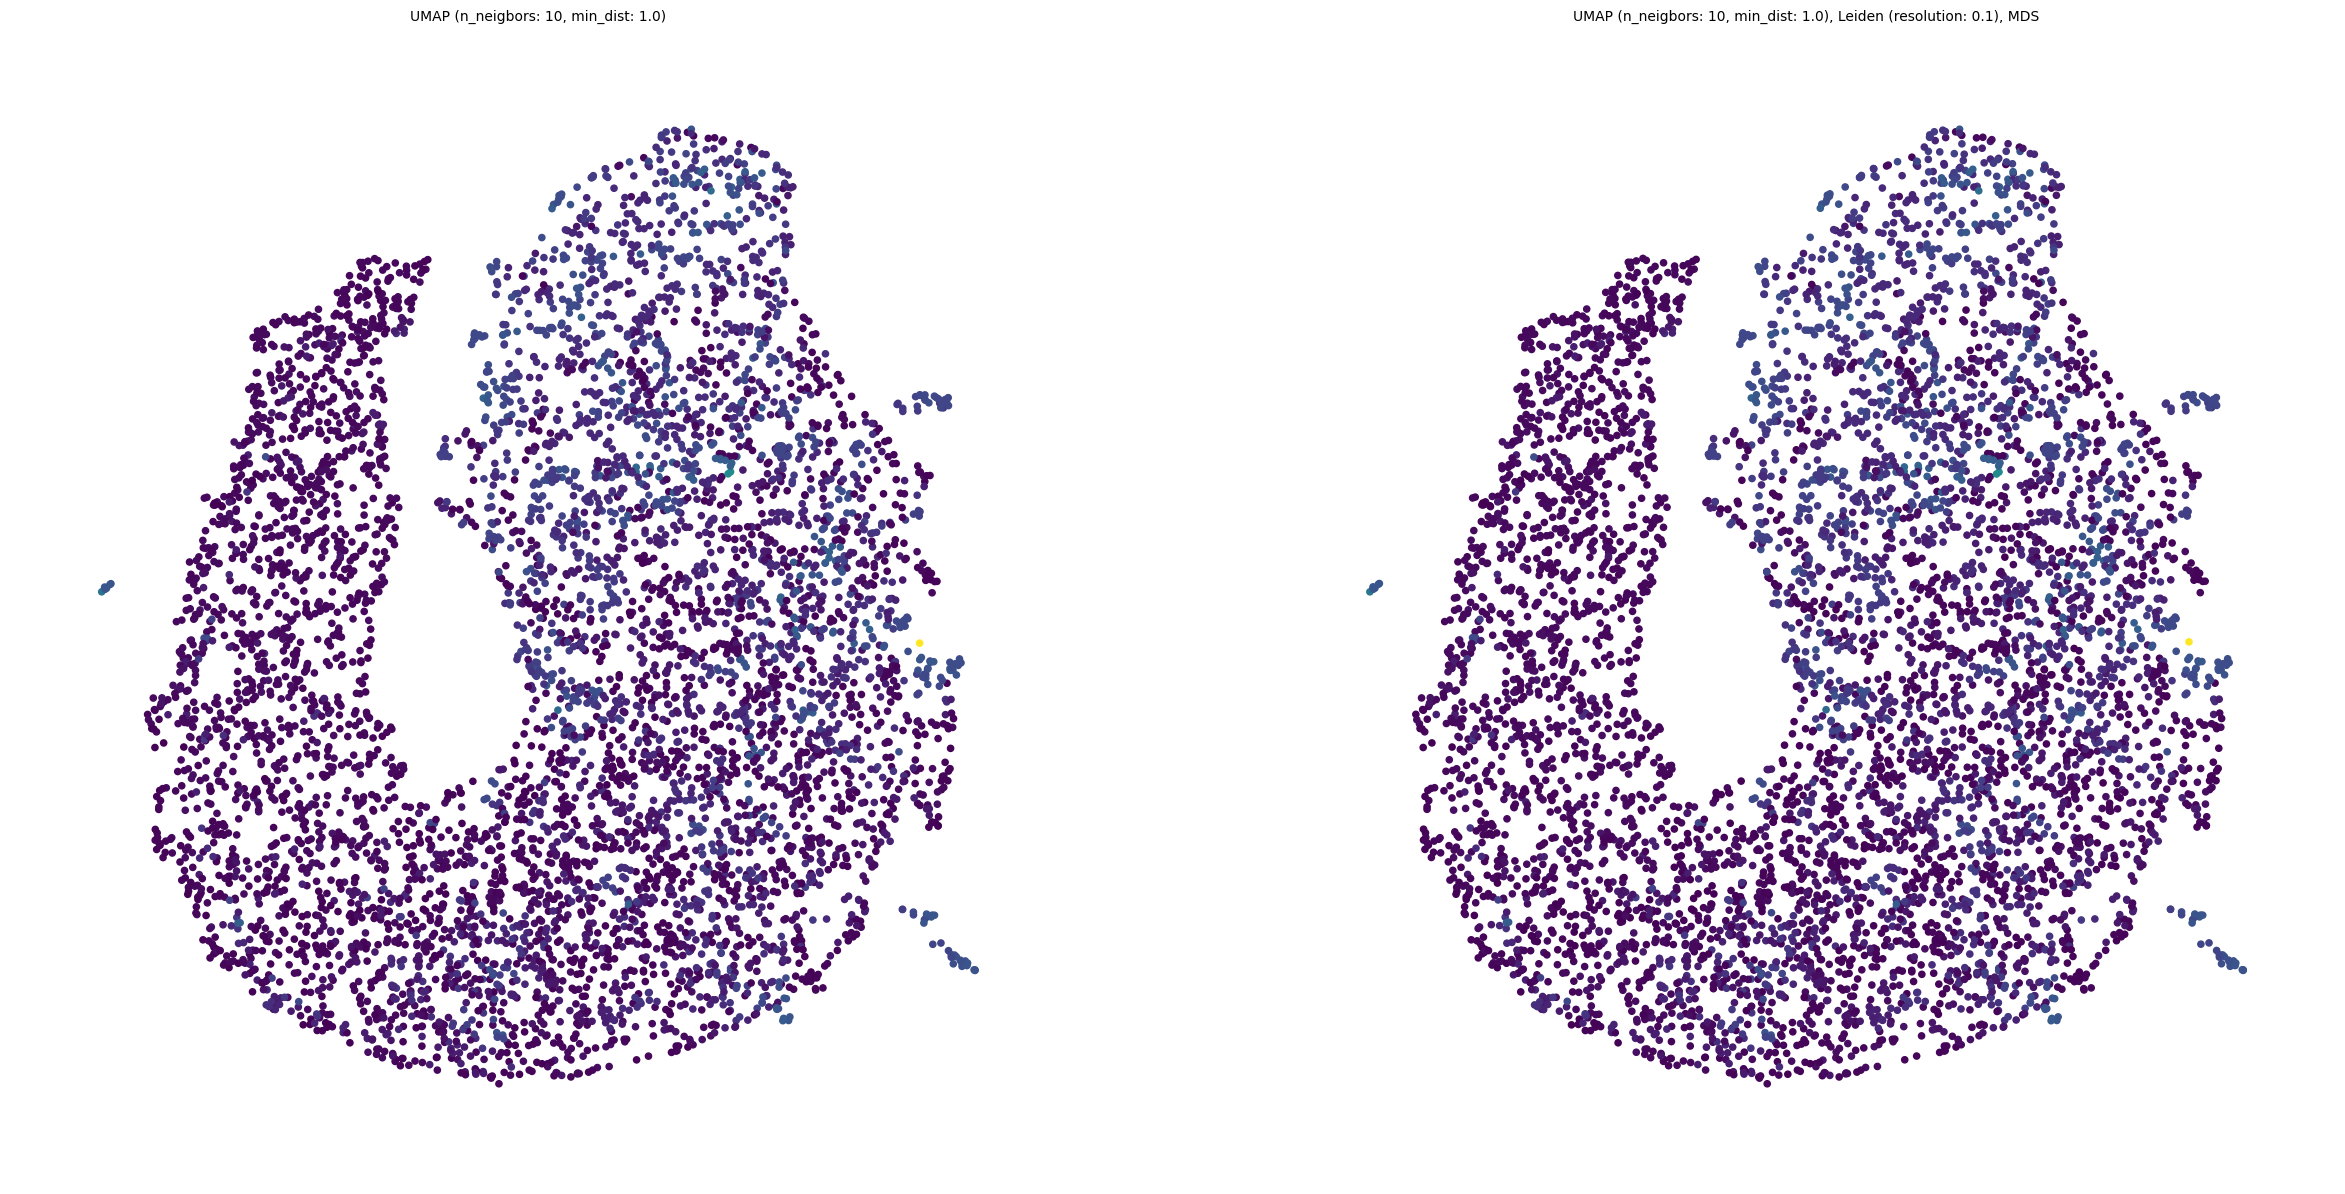

In [182]:
visualization.display_graphs(
    results=mod_embeddings,
    figsize_columns=2,
    figsize=(15, 15),
    cmap=plt.cm.viridis,
    edge_cmap=plt.cm.viridis,
    show_cbar=False,
    cbar_labels=None,
    show_edges=False,
    show_partition_centers=False,
    node_labels=None,
)

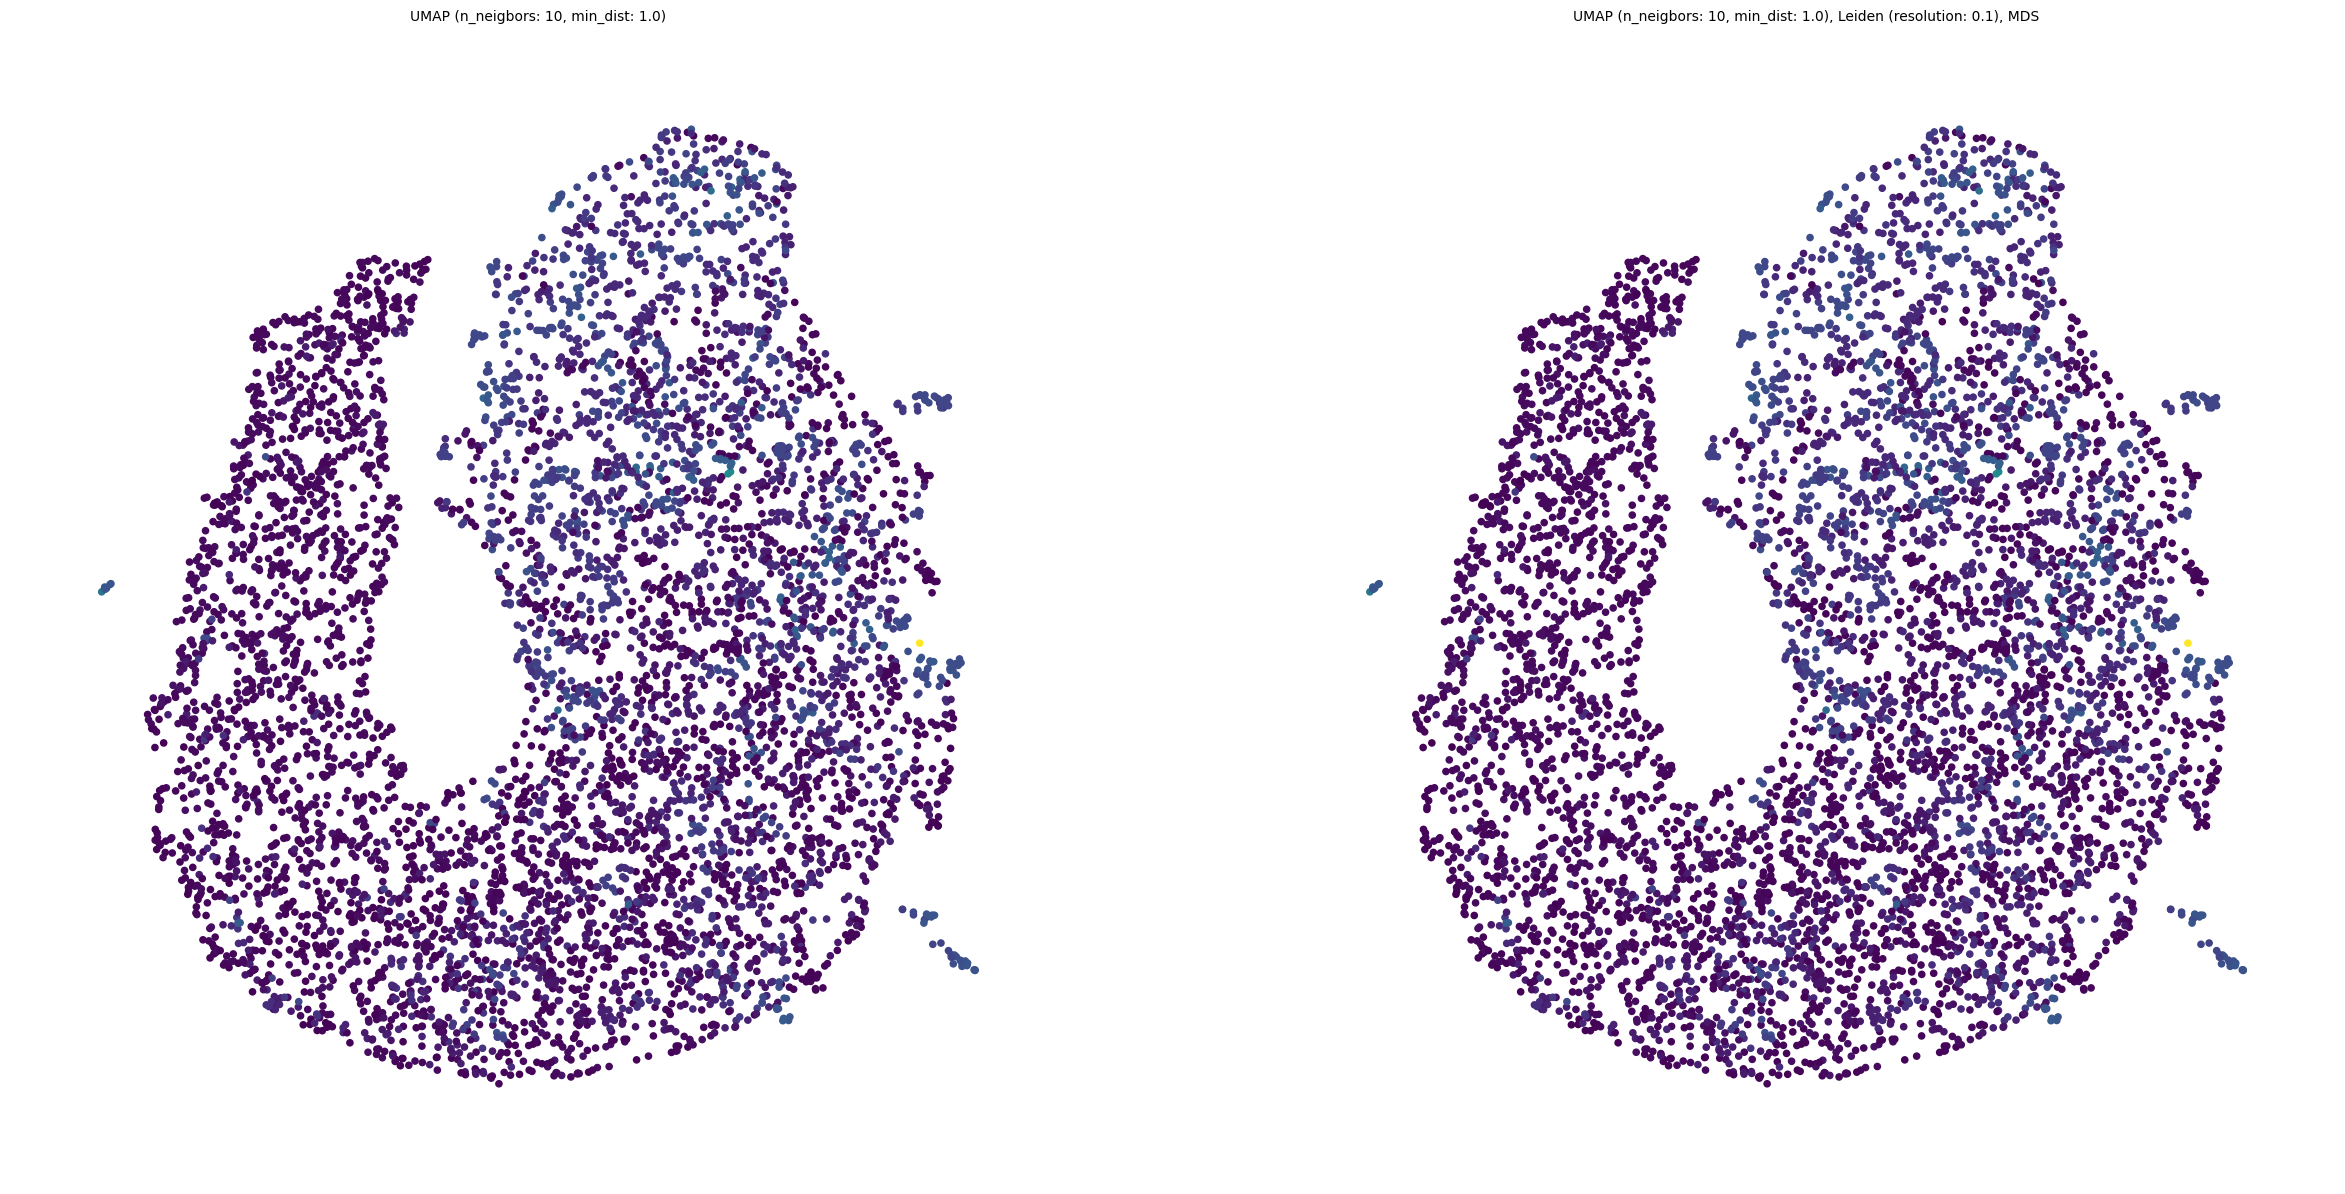

In [171]:
visualization.display_graphs(
    results=mod_embeddings,
    figsize_columns=2,
    figsize=(15, 15),
    cmap=plt.cm.viridis,
    edge_cmap=plt.cm.viridis,
    show_cbar=False,
    cbar_labels=None,
    show_edges=False,
    show_partition_centers=False,
    node_labels=None,
)

In [145]:
metrics_df_uci186 = evaluation.metrics_report(mod_embeddings)
metrics_df_uci186

marker  m_total_score  m_q_local  m_trustworthiness  m_continuity  \
0  0.917104       0.632673   0.710878           0.992077      0.992077   
1  0.917104       0.632672   0.710877           0.992075      0.992075   
2  0.917104       0.632672   0.710876           0.992074      0.992074   
3  0.917104       0.632672   0.710876           0.992074      0.992074   

   m_shepard_spearman  m_kruskal_stress  m_kruskal_stress_community     m_rnx  \
0            0.114798          0.646465                    0.646465  0.478338   
1            0.114798          0.646464                    0.576042  0.478307   
2            0.114798          0.646464                    0.602919  0.478307   
3            0.114798          0.646464                    0.631787  0.478261   

   m_global_rank_score  
0             0.820830  
1             0.820819  
2             0.820818  
3             0.820803

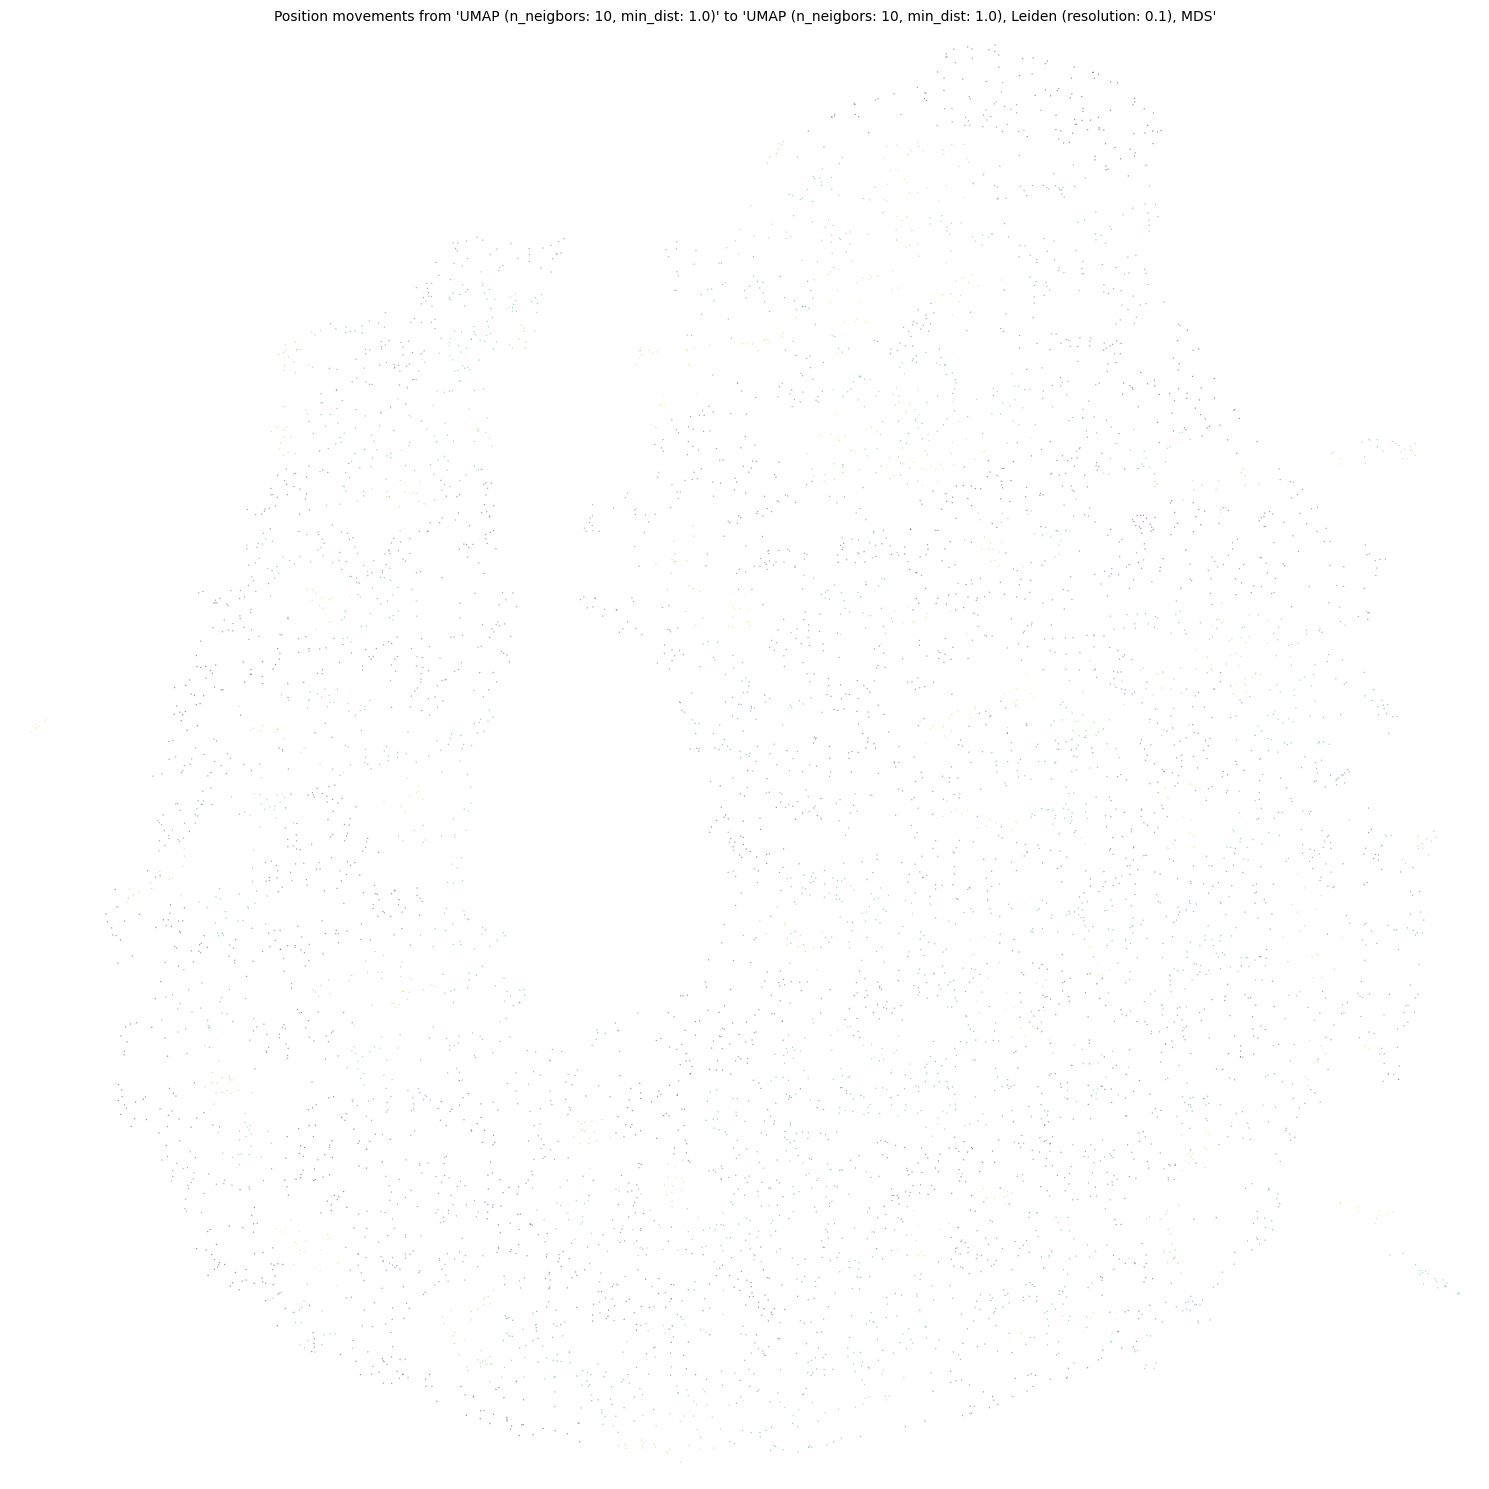

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': "Position movements from 'UMAP (n_neigbors: 10, min_dist: 1.0)' to 'UMAP (n_neigbors: 10, min_dist: 1.0), Leiden (resolution: 0.1), MDS'"}>)

In [173]:
visualization.plot_pos_movements(
    source=mod_embeddings[0],
    target=mod_embeddings[1],
    community_colors=True,
    # filtered_communities=np.arange(1, 40),
    community_centers=False,
)

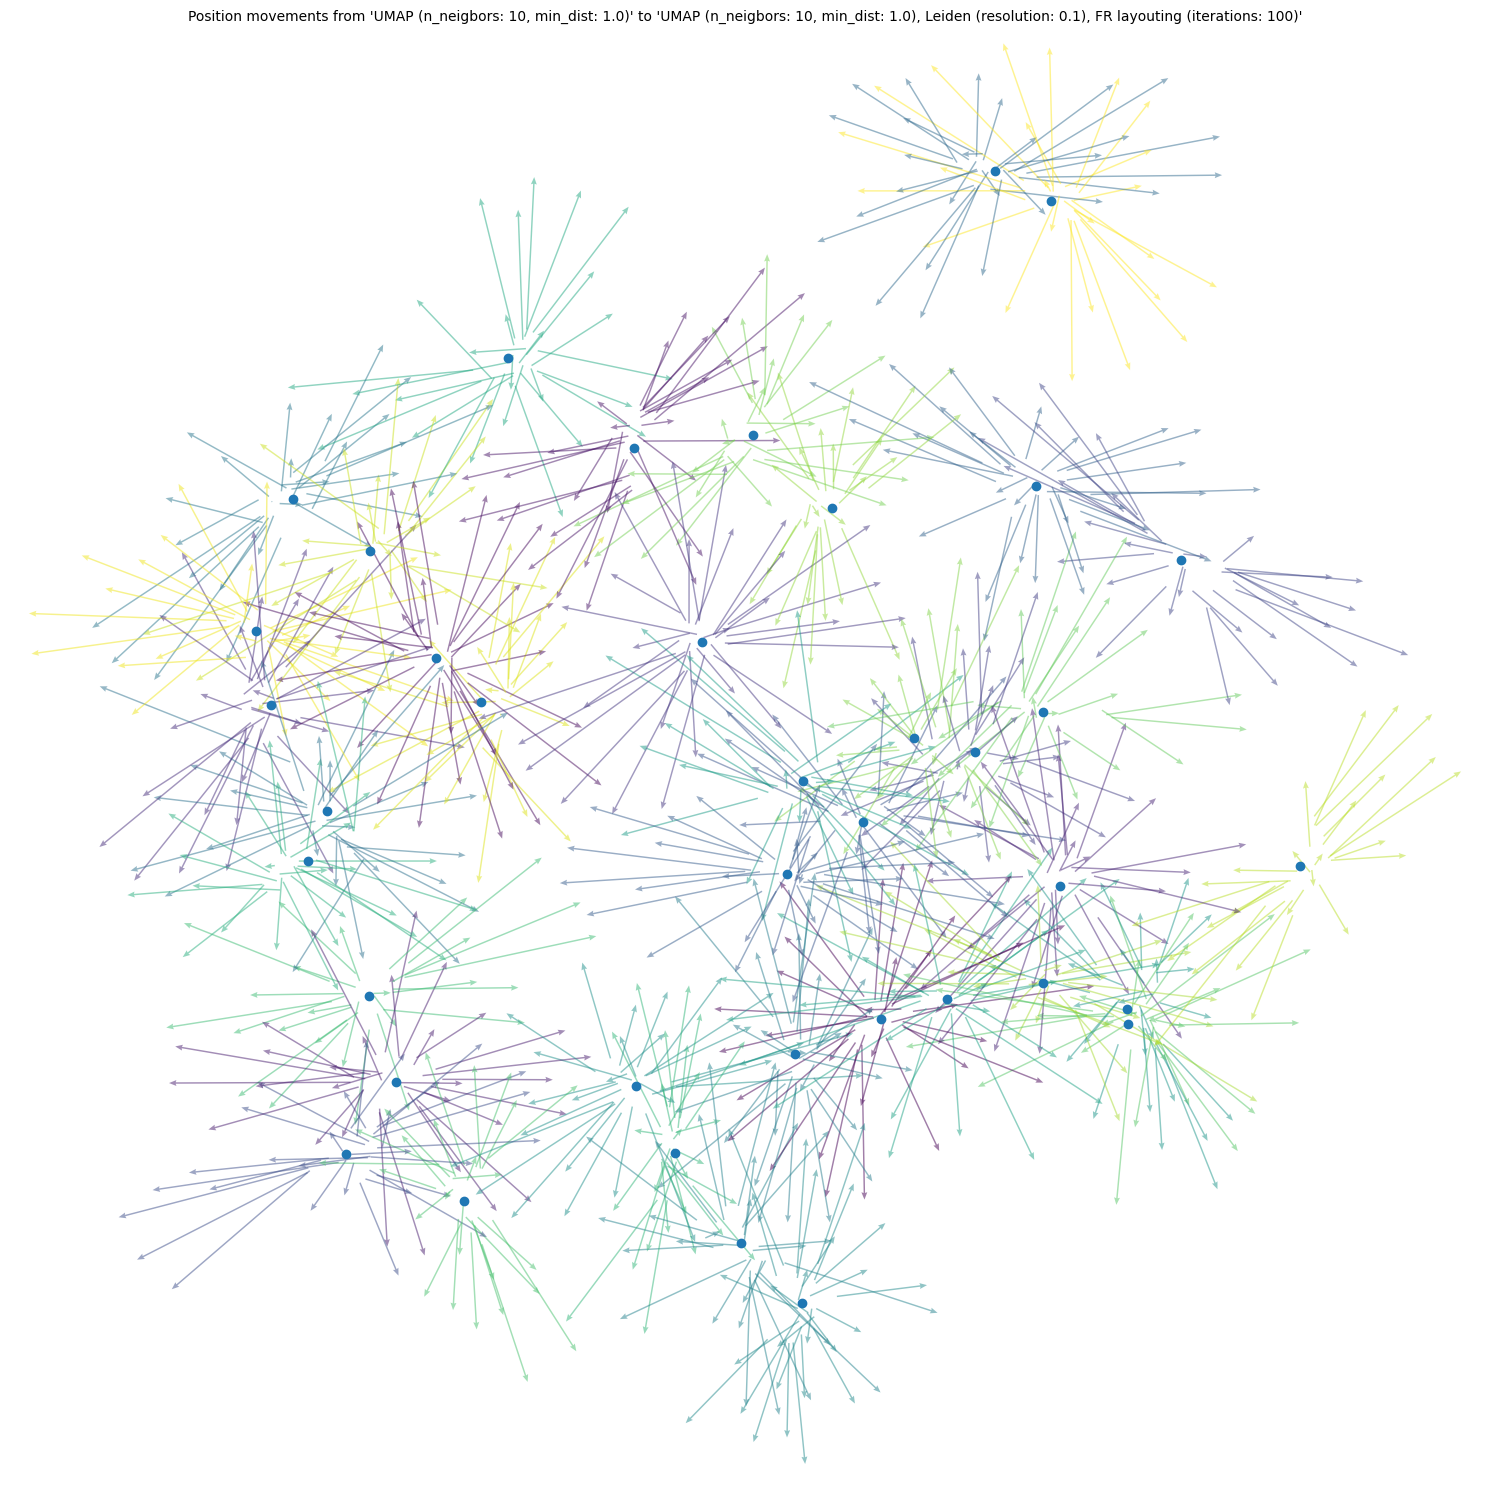

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': "Position movements from 'UMAP (n_neigbors: 10, min_dist: 1.0)' to 'UMAP (n_neigbors: 10, min_dist: 1.0), Leiden (resolution: 0.1), FR layouting (iterations: 100)'"}>)

In [ ]:
visualization.plot_pos_movements(
    source=mod_embeddings[0],
    target=mod_embeddings[2],
    community_colors=True,
    filtered_communities=np.arange(1, 40),
    community_centers=True,
)